# UAS KS RPLD

Notebook ini merupakan tugas pengganti Ujian Akhir Semester mata kuliah Kapita Selekta Rekayasa Perangkat Lunak dan Data yang bertujuan untuk memprediksi intensitas emosi yang terdapat dalam sebuah tweet dengan 0 sebagai nilai terendah dan 1 sebagai nilai tertinggi. Dataset yang digunakan dalam notebook diambil dari http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html yang menyediakan data berbentuk teks dalam empat kategori emosi (fear, anger, joy, dan sadness) dan tiga kategori set (training, development, dan testing).

Berikut adalah Exploratory Data Analysis, training, testing, evaluasi, dan analisis yang saya lakukan dari dataset tersebut:

## 1. Persiapan Data

### Load Training Data

Notebook diawali dengan mendownload dataset dari website yang berbentuk txt dan mengubahnya menjadi csv. Jalankan kode di bawah untuk mendownload tiap dataset yang digunakan.

In [1]:
#url="http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/anger-ratings-0to1.train.txt"
#c=pd.read_csv(url, header=None, sep='\t', names=cols, index_col=0)
#c.to_csv('anger_train.csv')

Setelah itu, import libraries yang dibutuhkan beserta dataset yang telah didownload tadi ke dalam notebook. Cetak salah satu dataset untuk melihat isinya.

In [2]:
import pandas as pd
import numpy as np
import string

cols = ['id', 'text','label','intensity']

anger = pd.read_csv('anger_train.csv')
fear = pd.read_csv('fear_train.csv')
joy = pd.read_csv('joy_train.csv')
sad = pd.read_csv('sadness_train.csv')

sad.head(10)

,id,text,label,intensity
0,40000,Depression sucks! #depression,sadness,0.958
1,40001,Feeling worthless as always #depression,sadness,0.958
2,40002,Feeling worthless as always,sadness,0.958
3,40003,My #Fibromyalgia has been really bad lately wh...,sadness,0.946
4,40004,Im think ima lay in bed all day and sulk. Life...,sadness,0.934
5,40005,So when I try I fail... and when I don't try.....,sadness,0.917
6,40006,Extreme sadness,sadness,0.917
7,40007,my life in one word is depressing,sadness,0.917
8,40008,Panic attacks are the worst. Feeling really si...,sadness,0.917
9,40009,Feel so grim + ugly atm,sadness,0.896


Untuk mempermudah pemrosesan, gabungkan dataset yang telah diimport menjadi satu data frame. Penggabungan ini dilakukan menggunakan fungsi pd.concat() yang dimasukkan pada frame training.

In [3]:
frames = [anger, fear, sad, joy]
training= pd.concat(frames)
training.reset_index(inplace = True)
training.head(10)

,index,id,text,label,intensity
0,0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
5,5,10005,My blood is boiling,anger,0.875
6,6,10006,When you've still got a whole season of Wentwo...,anger,0.875
7,7,10007,@bt_uk why does tracking show my equipment del...,anger,0.875
8,8,10008,@TeamShanny legit why i am so furious with him...,anger,0.875
9,9,10009,How is it suppose to work if you do that? Wtf ...,anger,0.875


Setelah melakukan penggabungan, notebook dilanjutkan dengan Exploratory Data Analysis singkat mengenai gabungan dataset ini.

### Exploratory Data Analysis

Untuk memulai EDA dalam notebook ini, akan diawali dengan mencaritahu berapa banyak tweet yang terdapat di setiap label/kategori. Jumlah tweet direpresentasikan dalam histogram berikut ini.

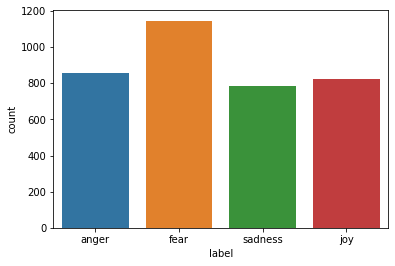

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.countplot(x='label', data = training)
plt.show()

training.label.value_counts()

Dari visualisasi di atas, dapat diketahui bahwa tweet berlabel fear memiliki jumlah paling banyak (1147), diikuti dengan anger (857), joy (823), dan sadness (786). 

Selanjutnya, kita akan mencaritahu 20 kata terbanyak yang dipakai dari dataframe training.

In [5]:
from collections import Counter

join_text = " ".join(training['text'].values)
counter_obj = Counter(join_text.split(" "))
counter_obj.most_common(20)

[('the', 1583),
 ('to', 1273),
 ('a', 1145),
 ('I', 1042),
 ('and', 912),
 ('', 869),
 ('of', 778),
 ('is', 757),
 ('in', 588),
 ('you', 567),
 ('my', 453),
 ('for', 431),
 ('that', 419),
 ('on', 362),
 ('it', 359),
 ('be', 340),
 ('me', 304),
 ('have', 290),
 ('so', 279),
 ('this', 275)]

Dari output tersebut, dapat terlihat bahwa 20 yang frekuensinya paling banyak digunakan kebanyakan terdiri dari stopwords, yaitu kata yang tidak memiliki makna berarti. Contohnya adalah 'the', 'to', 'of', dan sebagainya.

Kemudian akan divisualisasikan kata-kata yang paling banyak digunakan dalam dataframe dalam bentuk wordcloud. Wordcloud yang digunakan akan mengeliminasi kata-kata stopwords sehingga dapat menemukan kata lain yang dapat dijadikan kata kunci.

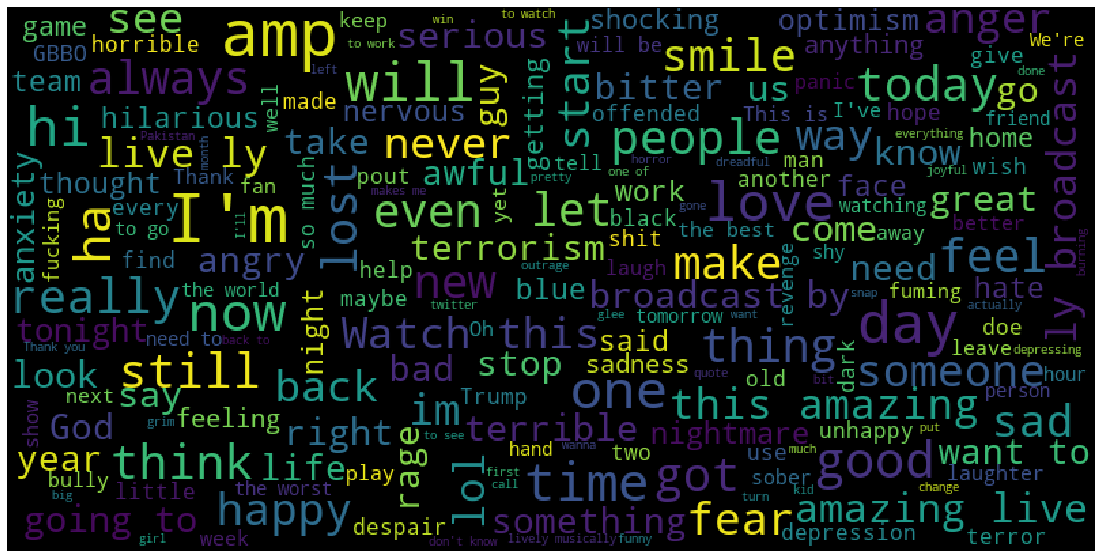

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, stopwords = stopwords, width=800, height=400).generate(join_text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Dari wordcloud seluruh kategori di atas, berikut adalah beberapa kata yang paling sering muncul dalam tweet:
- anger,
- amazing,
- good,
- people,
- dan seterusnya.


Selanjutnya, akan dicaritahu berapa banyak jumlah kata, jumlah karakter, serta jumlah tanda baca yang terdapat di setiap tweet. 

In [7]:
punc = string.punctuation
training['word_count'] = training['text'].apply(lambda x : len(x.split()))
training['char_count'] = training['text'].apply(lambda x : len(x.replace(" ","")))
training['punc_count'] = training['text'].apply(lambda x : len([a for a in x if a in punc]))


training[['word_count', 'char_count', 'punc_count']].head(10)

,word_count,char_count,punc_count
0,18,79,12
1,23,97,4
2,19,90,4
3,24,111,13
4,24,102,6
5,4,16,0
6,25,108,6
7,22,115,9
8,14,66,3
9,17,62,3


Dari output di atas, dapat diketahui bahwa wordcount berada di bawah kisaran 30 kata, dengan jumlah karakter maksimum sebanyak 140, dan tanda baca tidak lebih dari 15.

Setelah menambahkan ketiga kolom tersebut, akan dilihat statistik dataframe training.

In [8]:
training.describe()

,index,id,intensity,word_count,char_count,punc_count
count,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000
mean,462.437033,24719.287296,0.495199,16.033213,79.882646,4.647384
std,281.479047,10715.806835,0.190368,6.650965,31.094426,3.387929
min,0.000000,10000.000000,0.019000,1.000000,6.000000,0.000000
25%,225.000000,20046.000000,0.354000,10.000000,54.000000,2.000000
50%,451.000000,20949.000000,0.479000,17.000000,83.000000,4.000000
75%,677.000000,30705.000000,0.625000,22.000000,110.000000,6.000000
max,1146.000000,40785.000000,0.980000,32.000000,141.000000,29.000000


Dari statistik ini, dapat dilihat rata-rata intensitas emosi, jumlah kata, jumlah karakter, dan jumlah tanda baca yang terdapat pada tiap tweetnya.

Kali ini, dilihat frekuensi jumlah kata, jumlah tanda tanya dan tanda seru, serta jumlah emoji dalam per tweet setiap kategorinya dalam bentuk grafik. Proses ini diawali dengan import libraries yang diperlukan serta pembuatan class untuk memudahkan pemanggilan. Kemudian definisikan variabel yang akan dihitung frekuensi tweetnya, dilanjutkan dengan pendefinisian grafik yang akan digunakan 

In [9]:
import re
import emoji
from sklearn.base import BaseEstimator, TransformerMixin

class TextCounts(BaseEstimator, TransformerMixin):
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    def fit(self, X, y=None, **fit_params):
        return self
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        training = pd.DataFrame({'count_words': count_words,
                                'count_excl_quest_marks': count_excl_quest_marks, 
                                'count_emojis': count_emojis})
        return training
    
tc = TextCounts()
eda = tc.fit_transform(training.text)

eda['label'] = training.label

def show_dist(training, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(training.groupby('label')[col].describe())
    bins = np.arange(training[col].min(), training[col].max() + 1)
    g = sns.FacetGrid(training, col='label', height=5, hue='label')
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()

Di bawah ini akan menunjukkan frekuensi jumlah kata per tweet berdasarkan tiap kategorinya. Selain itu akan ditampilkan pula statistik untuk tiap-tiap labelnya.

Descriptive stats for count_words
---------------------------------
          count       mean       std  min   25%   50%   75%   max
label                                                            
anger     857.0  16.093349  7.064996  1.0  10.0  17.0  22.0  34.0
fear     1147.0  16.726242  6.679266  2.0  11.0  17.0  22.0  33.0
joy       823.0  16.120292  6.867630  2.0  10.0  16.0  22.0  33.0
sadness   786.0  17.221374  7.227115  1.0  11.0  18.0  23.0  33.0


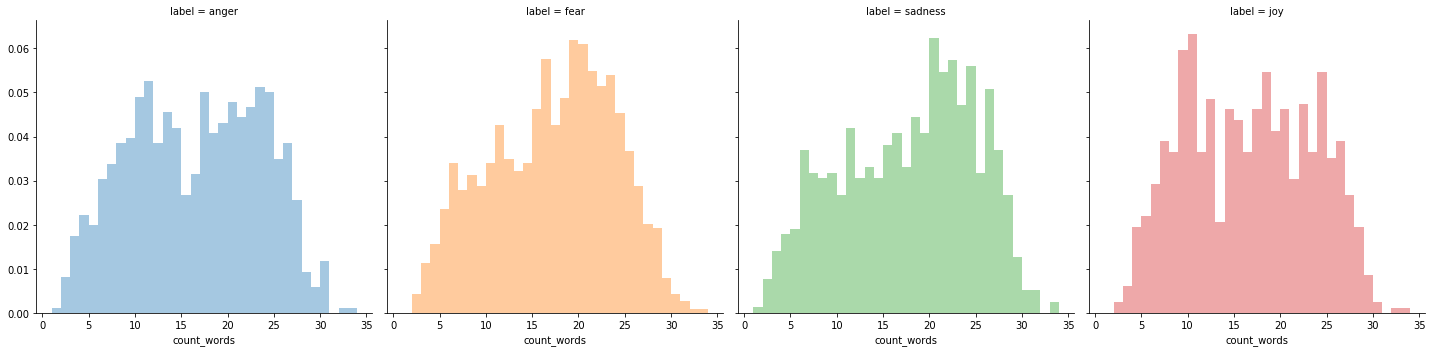

In [10]:
show_dist(eda, 'count_words')

Jadi, dari histogram di atas dapat diketahui bahwa rata-rata jumlah kata yang berada dalam setiap tweet adalah sekitar 16 sampai 17 di tiap kategorinya.

Di bawah ini akan menunjukkan frekuensi jumlah tanda tanya dan tanda seru per tweet berdasarkan tiap kategorinya. Selain itu akan ditampilkan pula statistik untuk tiap-tiap labelnya.

Descriptive stats for count_excl_quest_marks
--------------------------------------------
          count      mean       std  min  25%  50%  75%  max
label                                                       
anger     857.0  0.383897  1.043839  0.0  0.0  0.0  0.0  9.0
fear     1147.0  0.417611  0.942947  0.0  0.0  0.0  0.0  9.0
joy       823.0  0.336574  0.767155  0.0  0.0  0.0  0.0  5.0
sadness   786.0  0.330789  0.833987  0.0  0.0  0.0  0.0  6.0


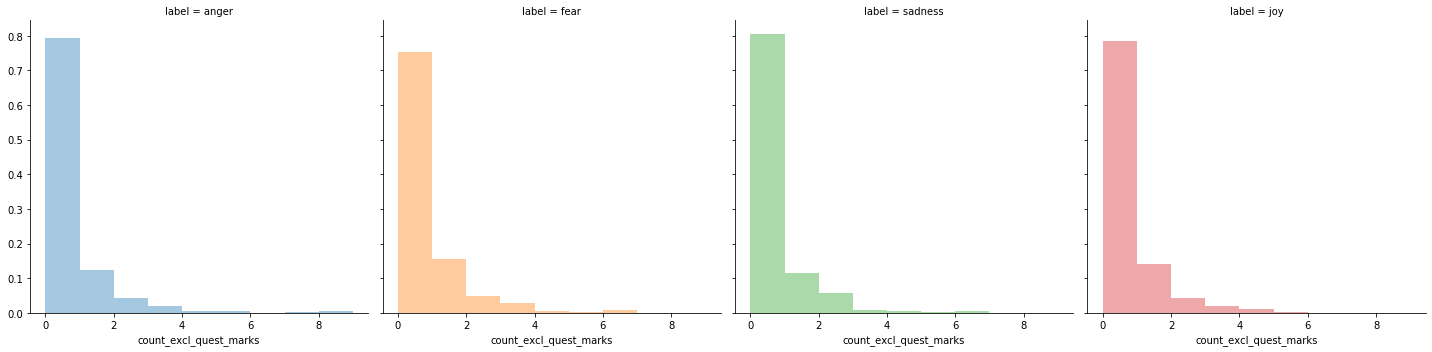

In [11]:
show_dist(eda, 'count_excl_quest_marks')

Jadi, dari histogram di atas dapat diketahui bahwa rata-rata jumlah tanda tanya dan tanda seru yang berada dalam setiap tweet adalah kurang dari 1 di tiap kategorinya.

Di bawah ini akan menunjukkan frekuensi jumlah emoji per tweet berdasarkan tiap kategorinya. Selain itu akan ditampilkan pula statistik untuk tiap-tiap labelnya.

Descriptive stats for count_emojis
----------------------------------
          count      mean       std  min  25%  50%  75%   max
label                                                        
anger     857.0  0.241540  0.998247  0.0  0.0  0.0  0.0  14.0
fear     1147.0  0.151700  0.507882  0.0  0.0  0.0  0.0   5.0
joy       823.0  0.212637  0.838395  0.0  0.0  0.0  0.0  11.0
sadness   786.0  0.256997  2.670930  0.0  0.0  0.0  0.0  73.0


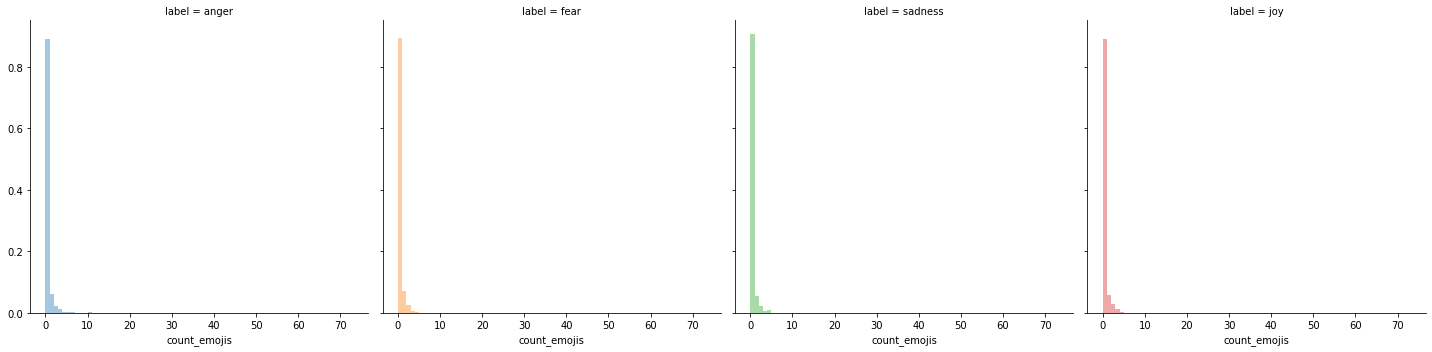

In [12]:
show_dist(eda, 'count_emojis')

Jadi, dari histogram di atas dapat diketahui bahwa rata-rata jumlah emoji yang berada dalam setiap tweet adalah kurang dari satu di tiap kategorinya.

Kemudian akan dilihat grafik intensitas emosi yang terdapat pada tweet berdasarkan kategorinya.

- Anger

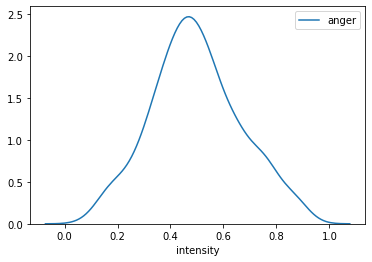

In [13]:
df = training[training.label == 'anger']
sns.distplot(df['intensity'], hist = False, kde=True, label='anger')

Dari grafik di atas, dapat dilihat bahwa intensitas emosi anger tertinggi terletak di antara 0,4 hingga 0,6.

- Fear

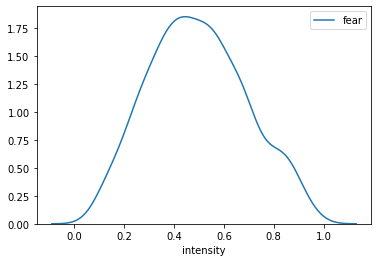

In [14]:
df = training[training.label == 'fear']
sns.distplot(df['intensity'], hist = False, kde=True, label='fear')

Dari grafik di atas, dapat dilihat bahwa intensitas emosi fear tertinggi terletak di antara 0,4 hingga 0,6.

- Joy

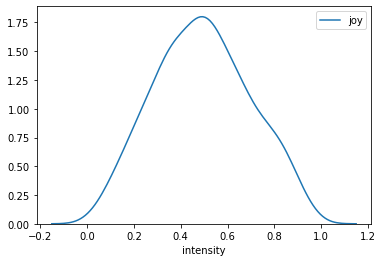

In [15]:
df = training[training.label == 'joy']
sns.distplot(df['intensity'], hist = False, kde=True, label='joy')

Dari grafik di atas, dapat dilihat bahwa intensitas emosi anger tertinggi terletak di antara 0,4 hingga 0,6.

- Sadness

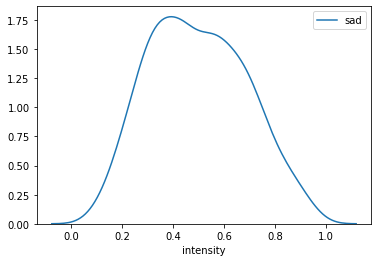

In [16]:
df = training[training.label == 'sadness']
sns.distplot(df['intensity'], hist = False, kde=True, label='sad')

Dari grafik di atas, dapat dilihat bahwa intensitas emosi sadness tertinggi terletak di antara 0,2 hingga 0,4.

Setelah menampilkan EDA, notebook akan dilanjutkan dengan text preprocessing.

### Text Preprocessing

Dalam text preprocessing, yang akan dilakukan pada tweet adalah memilah bagian text yang tidak diperlukan sehingga akan memudahkan pemrosesan ke depannya. Di notebook ini, preprocessing yang akan dilakukan adalah cleaning data tweet, lowercasing, tokenization, lemmatization, dan menghilangkan url serta stopwords.

In [17]:
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z_0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'[0-9]+'
combined_pat = r'|'.join((pat1, pat2, pat3))
stop_words = set(stopwords.words('english')) 

Kemudian, bentuk fungsi pembersih data yang menggabungkan variabel-variabel di atas agar dapat beroperasi dalam satu kali pemanggilan.

In [18]:
def tweet_cleaner(data_frame):
    print ("Cleaning and parsing the tweets...\n")
    clean_data = []
    for index, row in data_frame.iterrows():
        stripped = re.sub(combined_pat, '', row.text)
        lower_case = stripped.lower()
        words = tok.tokenize(lower_case)
        filtered_words = [w for w in words if not w in stop_words] 
        clean_data.append((" ".join(filtered_words)).strip())
        
    print ("Done!")
    return clean_data

Kemudian lakukan cleaning data pada dataframe training.

In [19]:
clean_data_training_list= tweet_cleaner(training)

Cleaning and parsing the tweets...

Done!


Setelah cleaning data berhasil dilakukan, print dataframe training.

In [20]:
training.text = pd.DataFrame(clean_data_training_list)
training.head(10)

,index,id,text,label,intensity,word_count,char_count,punc_count
0,0,10000,fu * k ! heck ! moved fridge !... knock landlo...,anger,0.938,18,79,12
1,1,10001,indian uber driver called someone n word . ' m...,anger,0.896,23,97,4
2,2,10002,asked parcel delivered pick store address # fu...,anger,0.896,19,90,4
3,3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,24,111,13
4,4,10004,"' join put phone , talk rude . taking money ac...",anger,0.896,24,102,6
5,5,10005,blood boiling,anger,0.875,4,16,0
6,6,10006,' still got whole season wentworth watch stupi...,anger,0.875,25,108,6
7,7,10007,"tracking show equipment delivered , ' ? servic...",anger,0.875,22,115,9
8,8,10008,"legit furious , people fucking idiots .",anger,0.875,14,66,3
9,9,10009,suppose work ? wtf dude ? thanks pissing .,anger,0.875,17,62,3


Apabila ingin mengetahui perbedaan sebelum dan sesudah melakukan text preprocessing, dapat dilakukan pencetakan kolom jumlah kata, jumlah karakter, serta jumlah tanda baca kembali.

In [21]:
training[['word_count', 'char_count', 'punc_count']].head(10)

,word_count,char_count,punc_count
0,18,79,12
1,23,97,4
2,19,90,4
3,24,111,13
4,24,102,6
5,4,16,0
6,25,108,6
7,22,115,9
8,14,66,3
9,17,62,3


Setelah melihat perbedaannya, simpan dataframe training dalam bentuk csv untuk memudahkan pemakaian kembali.

In [22]:
training.to_csv('emotion_training.csv',encoding='utf-8')

Notebook akan dilanjutkan dengan melakukan training terhadap tweet.

## 2. Training Data

Dalam melakukan training terhadap dataset, sebelumnya perlu terlebih dahulu melakukan Feature Extraction.

### Feature Extraction

Notebook ini akan melakukan Feature Extraction melalui beberapa metode, yaitu Bag of Words dan TF-IDF.

#### 1. Bag of Words
Fitur Bag of Words (BoW) digunakan untuk mengetahui berapa kali sebuah kata muncul dalam sebuah tweet dengan membuat vocabulary berisi kata-kata unik yang berada pada seluruh tweet.

Awalnya, buat vocabulary berisi kata-kata unik yang berada pada seluruh tweet dengan menjadikan satu kata-kata tersebut dalam sebuah vector. 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=500)
X_BoW = vectorizer.fit_transform(training.text)
print(vectorizer.get_feature_names())

['absolutely', 'accept', 'act', 'actually', 'afraid', 'alarm', 'almost', 'already', 'also', 'always', 'amazing', 'america', 'amp', 'anger', 'angry', 'animated', 'another', 'anxiety', 'anyone', 'anything', 'around', 'asked', 'ass', 'attack', 'away', 'awe', 'awful', 'back', 'bad', 'bb', 'bc', 'beautiful', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bitter', 'black', 'blame', 'blood', 'blues', 'boiling', 'book', 'boy', 'break', 'breezy', 'bright', 'broadcast', 'bully', 'burning', 'burst', 'call', 'called', 'car', 'care', 'cause', 'change', 'charlotte', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery', 'child', 'chirp', 'city', 'class', 'come', 'comes', 'coming', 'concern', 'contact', 'could', 'country', 'cry', 'crying', 'customer', 'cut', 'damn', 'dark', 'date', 'day', 'days', 'delight', 'depressing', 'depression', 'despair', 'die', 'discouraged', 'dog', 'done', 'dont', 'dreadful', 'dream', 'drop', 'dull', 'eat', 'either', 'elated', 'else', 'end', 'enough', 'episode', '

Untuk mengerti tentang penggunaan BoW, kita akan mencoba memasukkan sebuah kalimat untuk mengetahui apakah kata pembentuk kalimat tersebut berada pada vocabulary ini.

In [24]:
transformed_BoW = vectorizer.transform(["wow would you look at that"])
print (transformed_BoW)

  (0, 243)	1
  (0, 489)	1
  (0, 490)	1


Apabila dijadikan dalam bentuk sebuah array, maka kalimat tersebut akan direpresentasikan seperti di bawah ini.

In [25]:
print (transformed_BoW.toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Dari contoh kalimat di atas, dapat diketahui bahwa terdapat tiga kata yang berada di dalam vocabulary. Yaitu pada kata ke- 244, 490, dan 491. 

Selanjutnya, notebook akan diteruskan dengan penerapan TF-IDF.

#### 2. TF-IDF
Yang membedakan TF-IDF dari BoW adalah selain direpresentasikan dalam bentuk vector, sebuah kata akan dihitung bobotnya (seberapa penting ) kata tersebut dalam seluruh dokumen.

Untuk memulai TF-IDF, kita dapat membuat vocabulary-nya erlebih dahulu dalam bentuk array.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer_tfidf.fit_transform(training.text)
print(vectorizer_tfidf.get_feature_names())

['absolutely', 'accept', 'act', 'actually', 'afraid', 'alarm', 'almost', 'already', 'also', 'always', 'amazing', 'america', 'amp', 'anger', 'angry', 'animated', 'another', 'anxiety', 'anyone', 'anything', 'around', 'asked', 'ass', 'attack', 'away', 'awe', 'awful', 'back', 'bad', 'bb', 'bc', 'beautiful', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bitter', 'black', 'blame', 'blood', 'blues', 'boiling', 'book', 'boy', 'break', 'breezy', 'bright', 'broadcast', 'bully', 'burning', 'burst', 'call', 'called', 'car', 'care', 'cause', 'change', 'charlotte', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery', 'child', 'chirp', 'city', 'class', 'come', 'comes', 'coming', 'concern', 'contact', 'could', 'country', 'cry', 'crying', 'customer', 'cut', 'damn', 'dark', 'date', 'day', 'days', 'delight', 'depressing', 'depression', 'despair', 'die', 'discouraged', 'dog', 'done', 'dont', 'dreadful', 'dream', 'drop', 'dull', 'eat', 'either', 'elated', 'else', 'end', 'enough', 'episode', '

Perbedaannya dengan BoW akan terlihat setelah dimasukkan sebuah kalimat untuk dilihat availabilitynya.

In [27]:
transformed_tfidf = vectorizer_tfidf.transform(["wow would you look at that"])
print (transformed_tfidf)

  (0, 490)	0.6579746125115302
  (0, 489)	0.4953591680379262
  (0, 243)	0.5671760784192816


Dapat dilihat di sini bahwa selain menunjukkan tempat di mana kata tersebut berada, TF-IDF juga memberikan informasi berupa angka yang merupakan bobot sebuah kata tersebut. Apabila direpresentasikan dalam bentuk array, maka akan terlihat seperti ini.

In [28]:
print (transformed_tfidf.toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

### Training

Dalam bagian ini, akan dibuat model prediksi yang digunakan untuk mengetahui intensitas emosi yang terdapat dalam tiap tweet. Model yang digunakan di sini adalah Support Vector Regression.

Awalnya, load dataset yang akan diperlukan untuk testing, yaitu dataset development. Gabungkan tiap dataset menjadi dataframe dev.

In [29]:
cols = ['id','text','label','intensity']

anger_dev = pd.read_csv('anger_dev.csv')
fear_dev = pd.read_csv('fear_dev.csv')
sad_dev = pd.read_csv('sadness_dev.csv')
joy_dev = pd.read_csv('joy_dev.csv')

frames_dev = [anger_dev, fear_dev, sad_dev, joy_dev]
dev = pd.concat(frames_dev)
dev.reset_index(inplace=True)
dev.head(10)

,index,id,text,label,intensity
0,0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,4,10861,Sometimes I get mad over something so minuscul...,anger,0.708
5,5,10862,Sometimes I get mad over something so minuscul...,anger,0.646
6,6,10863,I think @Sam_Canaday &amp; @KYLEJDOWSON must a...,anger,0.250
7,7,10864,My eyes have been dilated. I hate the world ri...,anger,0.812
8,8,10865,@huwellwell One chosen by the CLP members! MP ...,anger,0.682
9,9,10866,@huwellwell One chosen by the CLP members! MP ...,anger,0.438


Kemudian, caritahu jumlah tweet yang ada dalam masing-masing label. 

In [30]:
dev.label.value_counts()

fear       110
anger       84
joy         79
sadness     74
Name: label, dtype: int64

Dapat diketahui bahwa terdapat terdapat 110 tweet dalam label fear, 84 dalam label anger, 79 dalam label joy, dan 74 dalam label sadness.

Kemudian bersihkan development set menggunakan fungsi yang tadi telah kita gunakan untuk membersihkan training setnya.

In [31]:
clean_data_dev_list= tweet_cleaner(dev)
dev.text = pd.DataFrame(clean_data_dev_list)
dev.head(10)

Cleaning and parsing the tweets...

Done!


,index,id,text,label,intensity
0,0,10857,pls dont insult word ' molna ',anger,0.479
1,1,10858,would almost took offense actually snapped,anger,0.458
2,2,10859,rutgers game abomination . affront god man . m...,anger,0.562
3,3,10860,"' lisa asked started raging , ' call ?' heh",anger,0.500
4,4,10861,sometimes get mad something minuscule try ruin...,anger,0.708
5,5,10862,sometimes get mad something minuscule try ruin...,anger,0.646
6,6,10863,think & amp ; must actually working like & amp...,anger,0.250
7,7,10864,eyes dilated . hate world right rage thousand ...,anger,0.812
8,8,10865,one chosen clp members ! mp seats people dole ...,anger,0.682
9,9,10866,one chosen clp members ! mp seats people dole ...,anger,0.438


Setelah itu, buat modelnya menggunakan representasi BoW dan TF-IDF.

- **Menggunakan BoW**

Import library yang akan digunakan terlebih dahulu sebelum membuat model. Karena akan menggunakan Bag of Words, maka yang dijadikan X adalah X_BoW.

In [32]:
from sklearn import svm

Y_training = training.intensity
model_BoW = svm.SVR(kernel='linear')
print("Training Regressor with BoW representation")
model_BoW.fit(X_BoW, Y_training)

Training Regressor with BoW representation


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Kemudian, print prediksi dari dataset development yang telah dimasukkan.

In [33]:
X_BoW_dev = vectorizer.transform(dev.text)
Y_dev = dev.intensity
y_pred = model_BoW.predict(X_BoW_dev)

print(y_pred)

[0.43059765 0.20427935 0.43997737 0.59690995 0.26300128 0.33489265
 0.39463287 0.56837599 0.71330206 0.47494206 0.34863075 0.70546097
 0.36181764 0.66349114 0.42513114 0.51132615 0.51132615 0.4461508
 0.68896155 0.49919213 0.39928012 0.83266685 0.45938774 0.54988106
 0.3427969  0.54302621 0.47483941 0.58849138 0.40638446 0.42089486
 0.67124526 0.51669847 0.53308012 0.50601825 0.485223   0.53800119
 0.50735227 0.50288067 0.49349145 0.44160265 0.46448218 0.46639462
 0.47987714 0.43828023 0.42758797 0.49103859 0.52016616 0.2974713
 0.83946759 0.69196896 0.45360896 0.50714544 0.40617433 0.77987996
 0.65223792 0.42217035 0.40454781 0.25099467 0.54554777 0.63599539
 0.40127792 0.44471112 0.5488143  0.42117225 0.41925852 0.43736797
 0.35121851 0.58734314 0.58734314 0.73818973 0.63985671 0.56348187
 0.75189398 0.58835467 0.4420261  0.45360896 0.50957059 0.53653113
 0.57626103 0.44843306 0.47943464 0.43946285 0.37252783 0.55657191
 0.21726885 0.45665154 0.48105579 0.51459636 0.55705824 0.558986

Simpan prediksi ini dalam sebuah dataframe untuk memudahkan akses.

In [34]:
Y_dev_df = pd.DataFrame(Y_dev)
X_BoW_dev_df = pd.DataFrame(X_BoW_dev.toarray())
y_pred_df = pd.DataFrame(y_pred)

dev_predict_BoW = dev.copy()
dev_predict_BoW.drop(['intensity'], axis = 1, inplace =True)
dev_predict_BoW['intensity'] = y_pred

- **Menggunakan TF-IDF**

Karena menggunakan model yang sama, maka cara yang digunakan juga hampir mirip. Yang menjadi perbedaannya, X yang digunakan adalah X_tfidf.

In [35]:
model_tfidf = svm.SVR(kernel='linear')
print("Training Regressor with TF-IDF representation")
model_tfidf.fit(X_tfidf, Y_training)

Training Regressor with TF-IDF representation


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Print prediksi dataset development TF-IDF, bandingkan dengan prediksi Bag of Words.

In [36]:
X_tfidf_dev = vectorizer_tfidf.transform(dev.text)
Y_tfidf_dev = dev.intensity
y_tfidf_pred = model_tfidf.predict(X_tfidf_dev)

print(y_tfidf_pred)

[0.38730877 0.24837682 0.4283547  0.57062654 0.55153056 0.58298208
 0.39412128 0.57270883 0.69388521 0.48296929 0.39887996 0.61687611
 0.40524179 0.55456732 0.42917306 0.51128595 0.51128595 0.44682317
 0.62041479 0.46781    0.38515948 0.77575009 0.42106234 0.54248734
 0.29183954 0.50902268 0.46353923 0.51133968 0.39954802 0.38984496
 0.63355571 0.5332275  0.50535353 0.56302829 0.48407262 0.53149993
 0.52636511 0.51638009 0.46979485 0.39623497 0.52173497 0.56918273
 0.51790949 0.4462572  0.44301182 0.52471142 0.55783396 0.22683411
 0.74492363 0.75415756 0.41951378 0.54886683 0.31033547 0.70879381
 0.64403138 0.45633117 0.34625263 0.2657299  0.50080989 0.68392498
 0.42816562 0.41680543 0.58172734 0.4936778  0.39217224 0.43224021
 0.43293205 0.64736435 0.64736435 0.63860955 0.60283861 0.49746273
 0.67841666 0.4650146  0.41324838 0.41951378 0.56385103 0.48492313
 0.61456767 0.52443392 0.47912577 0.44400051 0.34245518 0.53354409
 0.40029691 0.40412358 0.49274997 0.48410313 0.64734469 0.6373

Dari perbandingan antara model prediksi BoW dan TF-IDF, dapat disimpulkan bahwa nilai masing-masing prediksi berbeda, baik hanya ketepatan angka maupun berbeda sama sekali.

Simpan prediksi ini dalam sebuah dataframe untuk mempermudah pengaksesan.

In [37]:
Y_tfidf_dev_df = pd.DataFrame(Y_tfidf_dev)
X_tfidf_dev_df = pd.DataFrame(X_tfidf_dev.toarray())
y_tfidf_pred_df = pd.DataFrame(y_tfidf_pred)

dev_predict_tfidf = dev.copy()
dev_predict_tfidf.drop(['intensity'], axis = 1, inplace =True) 
dev_predict_tfidf['intensity'] = y_tfidf_pred

Setelah semua tersimpan dalam dataframe, baik BoW atau TF-IDF, simpan dalam bentuk file txt untuk nantinya digunakan ketika melakukan proses pengevaluasian. Sebelum itu, drop terlebih dahulu kolom yang tidak terpakai, yaitu kolom index dalam tiap-tiap dataframe.

In [38]:
dev = dev.drop(['index'], axis = 1)
dev = dev.set_index('id')
dev.head()

,text,label,intensity
id,,,
10857,pls dont insult word ' molna ',anger,0.479
10858,would almost took offense actually snapped,anger,0.458
10859,rutgers game abomination . affront god man . m...,anger,0.562
10860,"' lisa asked started raging , ' call ?' heh",anger,0.500
10861,sometimes get mad something minuscule try ruin...,anger,0.708


In [39]:
dev_predict_BoW = dev_predict_BoW.drop(['index'], axis = 1)
dev_predict_BoW = dev_predict_BoW.set_index('id')
dev_predict_BoW.head()

,text,label,intensity
id,,,
10857,pls dont insult word ' molna ',anger,0.430598
10858,would almost took offense actually snapped,anger,0.204279
10859,rutgers game abomination . affront god man . m...,anger,0.439977
10860,"' lisa asked started raging , ' call ?' heh",anger,0.596910
10861,sometimes get mad something minuscule try ruin...,anger,0.263001


In [40]:
dev_predict_tfidf = dev_predict_tfidf.drop(['index'], axis = 1)
dev_predict_tfidf = dev_predict_tfidf.set_index('id')
dev_predict_tfidf.head()

,text,label,intensity
id,,,
10857,pls dont insult word ' molna ',anger,0.387309
10858,would almost took offense actually snapped,anger,0.248377
10859,rutgers game abomination . affront god man . m...,anger,0.428355
10860,"' lisa asked started raging , ' call ?' heh",anger,0.570627
10861,sometimes get mad something minuscule try ruin...,anger,0.551531


Kode di bawah ini merupakan kode pengkonversian dataframe ke bentuk file ekstensi txt.

In [41]:
dev_predict_BoW.to_csv('DevPredBoW.txt',sep = '\t', header=None)
dev_predict_tfidf.to_csv('DevPredTFIDF.txt',sep = '\t', header=None)
dev.to_csv('Dev.txt',sep = '\t',header=None)

Setelah melakukan training pada dataset development, notebook akan melakukan testing pada dataset texting.

## 3. Testing

Pertama, load terlebih dahulu dataset testing yang akan digunakan. Kemudian gabungkan menjadi sebuah dataframe test. Print untuk mengetahui isi dataframe.

In [42]:
cols = ['id','text','label','intensity']

anger_test = pd.read_csv('anger_test.csv')
fear_test = pd.read_csv('fear_test.csv')
sad_test = pd.read_csv('sadness_test.csv')
joy_test = pd.read_csv('joy_test.csv')

frames_test = [anger_test, fear_test, sad_test, joy_test]
test = pd.concat(frames_test)
test.reset_index(inplace=True)
test.head(10)

,index,id,text,label,intensity
0,0,10941,At the point today where if someone says somet...,anger,0.319
1,1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,2,10943,This game has pissed me off more than any othe...,anger,0.898
3,3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646
5,5,10946,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583
6,6,10947,wanna go home and focus up on this game . Don'...,anger,0.375
7,7,10948,@virginmedia I've been disconnected whilst on ...,anger,0.625
8,8,10949,@virginmedia I've been disconnected whilst on ...,anger,0.396
9,9,10950,I wanna see you smile I don't wanna see you ma...,anger,0.250


Lalu caritahu jumlah tweet berdasarkan labelnya.

In [43]:
test.label.value_counts()

fear       995
anger      760
joy        714
sadness    673
Name: label, dtype: int64

Dapat diketahui bahwa terdapat terdapat 995 tweet dalam label fear, 760 dalam label anger, 714 dalam label joy, dan 673 dalam label sadness.

Kemudian bersihkan testing set menggunakan fungsi yang tadi telah kita gunakan untuk membersihkan training set dan development set.

In [44]:
clean_data_test_list= tweet_cleaner(test)
test.text = pd.DataFrame(clean_data_test_list)
test.head(10)

Cleaning and parsing the tweets...

Done!


,index,id,text,label,intensity
0,0,10941,point today someone says something remotely ki...,anger,0.319
1,1,10942,' game day !!!! minus : # relentless,anger,0.144
2,2,10943,game pissed game year . blood boiling ! time t...,anger,0.898
3,3,10944,' found ' candice candace . pout likes 😍,anger,0.271
4,4,10945,' come mum ' th k tweets 🙈 # soreloser,anger,0.646
5,5,10946,' come mum ' th k tweets 🙈 # bitter # soreloser,anger,0.583
6,6,10947,wanna go home focus game . ' wanna rage,anger,0.375
7,7,10948,' disconnected whilst holiday 😤 ' move house s...,anger,0.625
8,8,10949,' disconnected whilst holiday 😤 ' move house s...,anger,0.396
9,9,10950,wanna see smile ' wanna see make frown,anger,0.250


Setelah itu, kembali buat modelnya menggunakan representasi BoW dan TF-IDF.

- **Menggunakan BoW**

Buat model prediksinya terlebih dahulu.

In [45]:
test_BoW = svm.SVR(kernel='linear')
print("Testing Regressor with BoW representation")
test_BoW.fit(X_BoW, Y_training)

Testing Regressor with BoW representation


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
X_BoW_test = vectorizer.transform(test.text)
Y_test = test.intensity
y_testing = test_BoW.predict(X_BoW_test)

print(y_testing)

[0.40435607 0.3485953  0.69705899 ... 0.74856383 0.41384122 0.45559003]


Dapat ditinjau di sini bahwa jumlah entry dalam dataset terlalu besar untuk diprint secara keseluruhan dalam array, sehingga terdapat elipsis di tengah array. Kemudian simpan prediksi dalam dataframe.

In [47]:
Y_test_df = pd.DataFrame(Y_test)
X_BoW_test_df = pd.DataFrame(X_BoW_test.toarray())
y_testing_df = pd.DataFrame(y_testing)

test_predict_BoW = test.copy()
test_predict_BoW.drop(['intensity'], axis = 1, inplace =True)
test_predict_BoW['intensity'] = y_testing

- **Menggunakan TF-IDF**

Buat model prediksinya terlebih dahulu.

In [48]:
test_tfidf = svm.SVR(kernel='linear')
print("Testing Regressor with TF-IDF representation")
test_tfidf.fit(X_tfidf, Y_training)

Testing Regressor with TF-IDF representation


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
X_tfidf_test = vectorizer_tfidf.transform(test.text)
Y_tfidf_test = test.intensity
y_tfidf_testing = model_tfidf.predict(X_tfidf_test)

print(y_tfidf_testing)

[0.54240043 0.35376752 0.59545008 ... 0.71202411 0.4835967  0.46684127]


Simpan prediksi dalam bentuk dataframe.

In [50]:
Y_tfidf_test_df = pd.DataFrame(Y_tfidf_test)
X_tfidf_test_df = pd.DataFrame(X_tfidf_test.toarray())
y_tfidf_testing_df = pd.DataFrame(y_tfidf_testing)

test_predict_tfidf = test.copy()
test_predict_tfidf.drop(['intensity'], axis = 1, inplace =True)
test_predict_tfidf['intensity'] = y_tfidf_testing

Setelah semua prediksi tersimpan dalam dataframe, baik BoW atau TF-IDF, simpan dalam bentuk file txt untuk nantinya digunakan ketika melakukan proses pengevaluasian. Sebelum itu, drop terlebih dahulu kolom yang tidak terpakai, yaitu kolom index dalam tiap-tiap dataframe.

In [51]:
test = test.drop(['index'], axis = 1)
test = test.set_index('id')
test.head()

,text,label,intensity
id,,,
10941,point today someone says something remotely ki...,anger,0.319
10942,' game day !!!! minus : # relentless,anger,0.144
10943,game pissed game year . blood boiling ! time t...,anger,0.898
10944,' found ' candice candace . pout likes 😍,anger,0.271
10945,' come mum ' th k tweets 🙈 # soreloser,anger,0.646


In [52]:
test_predict_BoW = test_predict_BoW.drop(['index'], axis = 1)
test_predict_BoW = test_predict_BoW.set_index('id')
test_predict_BoW.head()

,text,label,intensity
id,,,
10941,point today someone says something remotely ki...,anger,0.404356
10942,' game day !!!! minus : # relentless,anger,0.348595
10943,game pissed game year . blood boiling ! time t...,anger,0.697059
10944,' found ' candice candace . pout likes 😍,anger,0.477347
10945,' come mum ' th k tweets 🙈 # soreloser,anger,0.503912


In [53]:
test_predict_tfidf = test_predict_tfidf.drop(['index'], axis = 1)
test_predict_tfidf = test_predict_tfidf.set_index('id')
test_predict_tfidf.head()

,text,label,intensity
id,,,
10941,point today someone says something remotely ki...,anger,0.542400
10942,' game day !!!! minus : # relentless,anger,0.353768
10943,game pissed game year . blood boiling ! time t...,anger,0.595450
10944,' found ' candice candace . pout likes 😍,anger,0.460657
10945,' come mum ' th k tweets 🙈 # soreloser,anger,0.555369


Prediksi yang telah disimpan di dataframe kemudian disimpan dalam bentuk file ekstensi txt untuk memudahkan evaluasi.

In [54]:
test_predict_BoW.to_csv('TestPredBoW.txt',sep = '\t', header=None)
test_predict_tfidf.to_csv('TestPredTFIDF.txt',sep = '\t', header=None)
test.to_csv('Test.txt',sep = '\t',header=None)

## 4. Evaluation

Dalam notebook ini, dataset akan dievaluasi menggunakan model evaluasi yang terdapat pada tautan https://github.com/felipebravom/EmoInt.

### Training/Development

Dalam sub bab ini, akan dievaluasi model yang telah dibuat untuk memprediksi intensitas emosi seluruh tweet dalam development set.

- **Menggunakan BoW**

Berikut adalah evaluasi menggunakan metode korelasi Pearson dan Spearman dari model SVR yang menggunakan Bag of Words.

In [55]:
!python evaluate.py 1 DevPredBoW.txt Dev.txt

Pearson correlation between  DevPredBoW.txt  and  Dev.txt :	 0.4035753110563416
Spearman correlation between  DevPredBoW.txt  and  Dev.txt :	 0.3750886921964293
Pearson correlation for gold scores in range 0.5-1 between  DevPredBoW.txt  and  Dev.txt :	 0.36893617209077684
Spearman correlation for gold scores in range 0.5-1 between  DevPredBoW.txt  and  Dev.txt :	 0.3519349652159768

Average Pearson correlation:	 0.4035753110563416
Average Spearman correlation:	 0.3750886921964293
Average Pearson correlation for gold scores in range 0.5-1:	 0.36893617209077684
Average Spearman correlationfor gold scores in range 0.5-1:	 0.3519349652159768


Ditinjau dari outputnya, dapat dilihat bahwa model SVR BoW dengan dataset Development lebih tinggi nilai korelasi Pearsonnya dibanding Spearman. Meski begitu, nilai korelasi keduanya tidak ada yang lebih dari 0,5, sehingga dapat disimpulkan bahwa model ini masih merupakan model yang memiliki korelasi rendah antara prediksi dan data aslinya.

- **Menggunakan TF-IDF**

Berikut adalah evaluasi menggunakan metode korelasi Pearson dan Spearman dari model SVR yang menggunakan TF-IDF.

In [56]:
!python evaluate.py 1 DevPredTFIDF.txt Dev.txt

Pearson correlation between  DevPredTFIDF.txt  and  Dev.txt :	 0.4303576219096421
Spearman correlation between  DevPredTFIDF.txt  and  Dev.txt :	 0.4011524051039543
Pearson correlation for gold scores in range 0.5-1 between  DevPredTFIDF.txt  and  Dev.txt :	 0.397467923653523
Spearman correlation for gold scores in range 0.5-1 between  DevPredTFIDF.txt  and  Dev.txt :	 0.39311363637648505

Average Pearson correlation:	 0.4303576219096421
Average Spearman correlation:	 0.4011524051039543
Average Pearson correlation for gold scores in range 0.5-1:	 0.397467923653523
Average Spearman correlationfor gold scores in range 0.5-1:	 0.39311363637648505


Ditinjau dari outputnya, dapat dilihat bahwa model SVR TF-IDF dengan dataset Development lebih tinggi nilai korelasi Pearsonnya dibanding Spearman. Selain itu, nilai korelasinya juga lebih tinggi dibanding model SVR BoW. Meski begitu karena nilai korelasi TF-IDF tidak ada yang lebih dari 0,5, dapat disimpulkan bahwa model ini masih merupakan model yang memiliki korelasi rendah antara prediksi dan data aslinya.

### Testing

Dalam sub bab ini, akan dievaluasi model yang telah dibuat untuk memprediksi intensitas emosi seluruh tweet dalam testing set.

- **Menggunakan BoW**

Berikut adalah evaluasi menggunakan metode korelasi Pearson dan Spearman dari model SVR yang menggunakan Bag of Words.

In [57]:
!python evaluate.py 1 TestPredBow.txt Test.txt

Pearson correlation between  TestPredBow.txt  and  Test.txt :	 0.43505461332032297
Spearman correlation between  TestPredBow.txt  and  Test.txt :	 0.4252365546885121
Pearson correlation for gold scores in range 0.5-1 between  TestPredBow.txt  and  Test.txt :	 0.3303219247731476
Spearman correlation for gold scores in range 0.5-1 between  TestPredBow.txt  and  Test.txt :	 0.2988058045976678

Average Pearson correlation:	 0.43505461332032297
Average Spearman correlation:	 0.4252365546885121
Average Pearson correlation for gold scores in range 0.5-1:	 0.3303219247731476
Average Spearman correlationfor gold scores in range 0.5-1:	 0.2988058045976678


Dari outputnya, dapat dilihat bahwa rata-rata korelasinya baik Pearson dan Spearman lebih tinggi dibanding rata-rata korelasi dalam development set. Namun, rata-rata korelasi untuk gold scorenya lebih rendah dibanding rata-rata korelasi dalam development set. 

Walaupun korelasi Pearson lebih tinggi nilainya dibanding Spearman, nilai keduanya masih di bawah 0,5 untuk kedua kategori, sehingga model ini masih termasuk model yang berkorelasi rendah antara prediksi dan data aslinya.

- **Menggunakan TF-IDF**

Berikut adalah evaluasi menggunakan metode korelasi Pearson dan Spearman dari model SVR yang menggunakan TF-IDF.

In [58]:
!python evaluate.py 1 TestPredTFIDF.txt Test.txt

Pearson correlation between  TestPredTFIDF.txt  and  Test.txt :	 0.4409088610668062
Spearman correlation between  TestPredTFIDF.txt  and  Test.txt :	 0.4248288612090128
Pearson correlation for gold scores in range 0.5-1 between  TestPredTFIDF.txt  and  Test.txt :	 0.32947103589096755
Spearman correlation for gold scores in range 0.5-1 between  TestPredTFIDF.txt  and  Test.txt :	 0.2971136868202509

Average Pearson correlation:	 0.4409088610668062
Average Spearman correlation:	 0.4248288612090128
Average Pearson correlation for gold scores in range 0.5-1:	 0.32947103589096755
Average Spearman correlationfor gold scores in range 0.5-1:	 0.2971136868202509


Dari outputnya, dapat dilihat bahwa rata-rata korelasinya baik Pearson dan Spearman lebih tinggi dibanding rata-rata korelasi dalam development set. Namun, rata-rata korelasi untuk gold scorenya lebih rendah dibanding rata-rata korelasi dalam development set. 

Walaupun korelasi Pearson lebih tinggi nilainya dibanding Spearman, nilai keduanya masih di bawah 0,5 untuk kedua kategori, sehingga model ini masih termasuk model yang berkorelasi rendah antara prediksi dan data aslinya.

## 5. Analisis Singkat

Setelah menjalankan EDA, training, testing, dan evaluasi, berikut adalah beberapa penemuan dalam notebook ini:

### EDA
- Tweet berlabel fear berjumlah paling banyak di antara label lain, sementara itu tweet berlabel sadness berjumlah paling sedikit.
- 20 kata terbanyak digunakan dalam data frame training kebanyakan berupa stopwords.
- Rata-rata jumlah kata per tweet adalah 16-17 dalam setiap kategorinya.
- Rata-rata jumlah tanda baca dan emoji adalah kurang dari 1 dalam setiap kategorinya
- Frekuensi intensitas emosi terbanyak pada anger, fear, dan joy berkisar dari 0,4  hingga 0,6, sementara pada sadness berkisar dari 0,2 hingga 0,4.

### Training
- Training menggunakan dataset training yang dites ke dataset development. Modelnya menggunakan SVR dengan Bag of Words dan TF-IDF sebagai feature extraction.
- Walau menggunakan model yang sama, nilai model yang menggunakan BoW sebagai feature extraction dan TF-IDF berbeda.

### Testing
- Testing menggunakan dataset training yang dites ke dataset testing. Modelnya menggunakan SVR dengan Bag of Words dan TF-IDF sebagai feature extraction.
- Walau menggunakan model yang sama, nilai model yang menggunakan BoW sebagai feature extraction dan TF-IDF berbeda.

### Evaluation
- Evaluation menggunakan model korelasi Pearson dan Spearman.
- Nilai korelasi Pearson selalu lebih tinggi daripada Spearman.
- Nilai korelasi TF-IDF selalu lebih tinggi daripada Bag of Words tiap set.
- Nilai rata-rata korelasi gold score training set lebih rendah dibanding development set.
- Semua nilai korelasi lebih rendah dibanding 0,5, sehingga model-model yang digunakan memiliki korelasi dan keakuratan prediksi yang rendah dibanding data aslinya
- Oleh karenanya, diperlukan model yang lebih akurat untuk memprediksi intensitas emosi di dalam tweet.